-> criar classif nao supervisionado com a base adult.csv e usar a coluna income como base

usar dbscan e kmeans normal

In [127]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
import numpy as np



In [117]:
df = pd.read_csv('Datasets/adult.csv')

In [190]:
(df['income']== "<=50").count()

48842

## O melhor resultado foi com OneHotEncoder

In [174]:
# for coluna in X.columns:
#     if isinstance(X[coluna].iloc[1], str):
#         X[coluna] = lb.fit_transform(X[coluna])

# X = df.drop(['income','capital-gain', 'capital-loss'], axis=1)
X = df.drop(['income'], axis=1)
le = preprocessing.LabelEncoder()
# lb = LabelBinarizer()
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame() 
enc_df_parcial = []


# for coluna in X.columns:
#     if isinstance(X[coluna].iloc[1], str):
#         X[coluna] = lb.fit_transform(X[coluna])
        
        
for coluna in X.columns:
    if isinstance(X[coluna].iloc[1], str):
        enc_df_parcial = pd.DataFrame(enc.fit_transform(np.array(X[coluna]).reshape(-1, 1)).toarray())
        print(enc_df_parcial.shape)
        enc_df = pd.concat([enc_df, enc_df_parcial], axis = 1)
        X.drop([coluna], axis=1, inplace = True)


# print(enc_df)
X = pd.concat([X, enc_df], axis=1)
# X = X.reshape(-1, 1)
display(X)

(48842, 9)
(48842, 16)
(48842, 7)
(48842, 15)
(48842, 6)
(48842, 5)
(48842, 2)
(48842, 42)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,dbscan,kmeans,0,1,...,32,33,34,35,36,37,38,39,40,41
0,25,226802,7,0,0,40,-1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,0,0,50,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,336951,12,0,0,40,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,10,7688,0,40,2,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,10,0,0,30,3,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,-1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,40,154374,9,0,0,40,8,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,58,151910,9,0,0,40,723,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,22,201490,9,0,0,20,20,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [175]:
print(X.shape)

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
display(pd.DataFrame(X))

(48842, 110)


,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0.000723,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,0.001446,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0.002169,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0.002892,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.165763,0.733333,0.000000,0.0,0.377551,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,0.315068,0.096129,0.533333,0.000000,0.0,0.397959,0.006508,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,0.561644,0.094462,0.533333,0.000000,0.0,0.397959,0.523500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.068493,0.128004,0.533333,0.000000,0.0,0.193878,0.015184,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [176]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)


In [177]:
print(len(distances))

48842


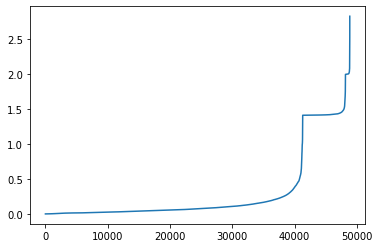

In [178]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [179]:
from sklearn.cluster import DBSCAN

m = DBSCAN(eps=0.5, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [180]:
df['dbscan'] = m.labels_
print(list(clusters))

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

In [181]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [182]:
df['kmeans'] = model.labels_

In [183]:
display(pd.DataFrame(df))

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dbscan,kmeans
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,-1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,2,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,-1,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,8,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,717,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,20,0


In [185]:
# menor_1 = ((df.income == "<=50K")== 1)
df.income = le.fit_transform(df.income)

In [186]:
print(classification_report(df.income,df.kmeans))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79     37155
           1       0.45      0.76      0.56     11687

    accuracy                           0.72     48842
   macro avg       0.67      0.73      0.68     48842
weighted avg       0.79      0.72      0.74     48842

